In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

This notebook creates maps for visualizing the clusters from unsupervised learning in a more practical sense.

In [3]:
#import shapefiles for all counties in the United States from the Census Bureau
# File available at https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/tl_2024_us_county.zip
gdf=gpd.read_file('tl_2024_us_county/tl_2024_us_county.shp')

In [4]:
#import the csv for the optimal clustering of 2 clusters, and an exploratory clustering of 5 clusters
cluster_df_2=pd.read_csv('clusters_n_2.csv')
cluster_df=pd.read_csv('clusters.csv')

In [5]:
cluster_df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
#convert 'fipsCode' to 'GEOID' to merge with shapefiles
cluster_df.rename(columns={'fipsCode':'GEOID'},inplace=True)
cluster_df.drop_duplicates(inplace=True)

In [7]:
cluster_df.head()

,GEOID,housing_cluster,econ_cluster
0,48015,0,3
3,48037,0,0
4,48039,2,3
9,48071,0,1
13,48157,2,1


In [8]:
#convert dtype of GEOID so that it can merge with cluster data
gdf['GEOID']=gdf['GEOID'].astype('int64')

In [9]:
top_ten=gdf.merge(cluster_df,how='inner',on=['GEOID'])

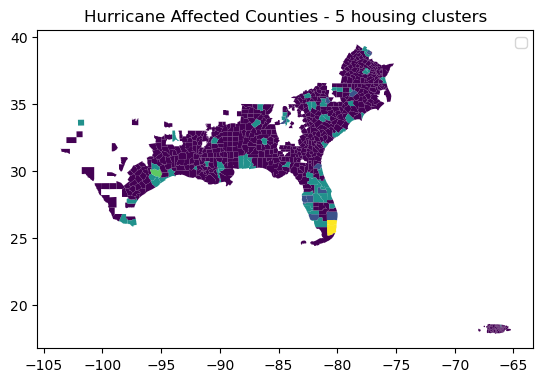

In [10]:
#plot affected counties from the top ten states
top_ten.plot(column='housing_cluster', legend=False)
plt.legend([0,1,2,3,4])
plt.title("Hurricane Affected Counties - 5 housing clusters")
plt.show()

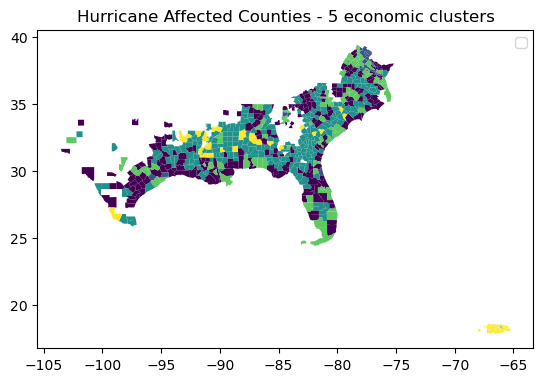

In [11]:
top_ten.plot(column='econ_cluster')
plt.legend([0,1,2,3,4])
plt.title("Hurricane Affected Counties - 5 economic clusters")
plt.show()

In [12]:
#cluster_df_2.drop(columns=['Unnamed: 0'],inplace=True)
cluster_df_2.rename(columns={'fipsCode':'GEOID'},inplace=True)
cluster_df_2.drop_duplicates(inplace=True)
top_ten_2=gdf.merge(cluster_df_2,how='inner',on=['GEOID'])

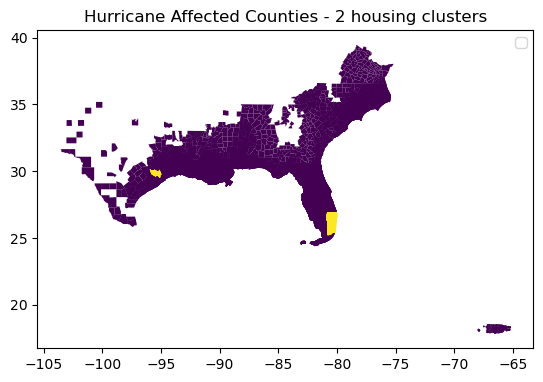

In [13]:
top_ten_2.plot(column='housing_cluster', legend=False)
plt.legend([0,1,2,3,4])
plt.title("Hurricane Affected Counties - 2 housing clusters")
plt.show()

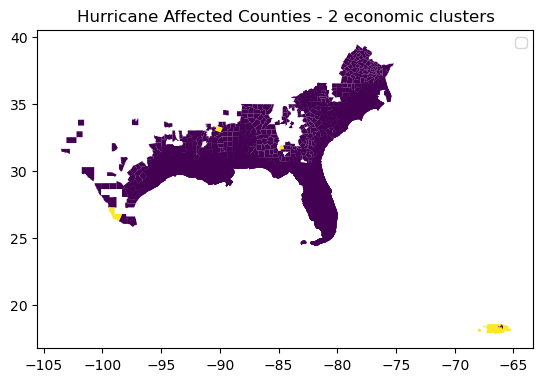

In [14]:
top_ten_2.plot(column='econ_cluster')
plt.legend([0,1,2,3,4])
plt.title("Hurricane Affected Counties - 2 economic clusters")
plt.show()